In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
########### EDA corpus ###############
f_corpus = open('data/legal_corpus.json')
corpus = json.load(f_corpus)

In [5]:
freq_articles = {}   # number of appearance of articles in questions
for law in corpus:
    prefix = law['law_id']
    articles = law['articles']
    for article in articles:
        key = prefix + '=' + article['article_id']
        freq_articles[key] = 0

In [6]:
f_question = open('data/train_question_answer.json')
questions = json.load(f_question)

In [7]:
questions = questions['items']
n_questions = 0
for question in questions:
    n_questions += 1
    relevant_articles = question['relevant_articles']
    for relevant_article in relevant_articles:
        key = relevant_article['law_id'] + '=' + relevant_article['article_id']
        freq_articles[key] += 1
print('n_questions: ', n_questions)

n_questions:  3196


In [8]:
for key in freq_articles.keys():
    if freq_articles[key] >= 7:
        print('{} . {}'.format(freq_articles[key], key))

7 . 05/2019/tt-bgtvt=2
11 . 06/2019/nđ-cp=3
83 . 100/2019/nđ-cp=5
73 . 100/2019/nđ-cp=6
17 . 100/2019/nđ-cp=11
31 . 100/2019/nđ-cp=12
13 . 100/2019/nđ-cp=13
30 . 100/2019/nđ-cp=15
24 . 100/2019/nđ-cp=16
18 . 100/2019/nđ-cp=17
9 . 100/2019/nđ-cp=20
13 . 100/2019/nđ-cp=23
12 . 100/2019/nđ-cp=31
11 . 100/2019/nđ-cp=32
16 . 100/2019/nđ-cp=37
12 . 15/2020/nđ-cp=8
8 . 167/2013/nđ-cp=5
10 . 18/2019/nđ-cp=3
8 . 28/2018/tt-btc=8
10 . 35/2019/nđ-cp=7
8 . 35/2019/nđ-cp=8
19 . 35/2019/nđ-cp=12
9 . 45/2017/tt-byt=3
10 . 82/2020/nđ-cp=15


In [10]:
n_articles_not_used = 0
for key in freq_articles.keys():
    if freq_articles[key] == 0:
        n_articles_not_used += 1

In [12]:
print('n_articles_not_used: ', n_articles_not_used)

n_articles_not_used:  59193


In [13]:
print('n_articles: ', len(freq_articles.keys()))

n_articles:  61425


In [16]:
freq_article_count = {}
for key in freq_articles.keys():
    freq = freq_articles[key]
    if freq not in freq_article_count.keys():
        freq_article_count[freq] = 1
    else:
        freq_article_count[freq] += 1

In [17]:
print('freq_article_count: ', freq_article_count)

freq_article_count:  {0: 59193, 1: 1797, 3: 83, 2: 280, 5: 18, 6: 10, 7: 1, 11: 2, 4: 20, 83: 1, 73: 1, 17: 1, 31: 1, 13: 2, 30: 1, 24: 1, 18: 1, 9: 2, 12: 2, 16: 1, 8: 3, 10: 3, 19: 1}


In [18]:
x, y = [], []
for key in sorted(freq_article_count.keys()):
    x.append(str(key))
    y.append(freq_article_count[key])

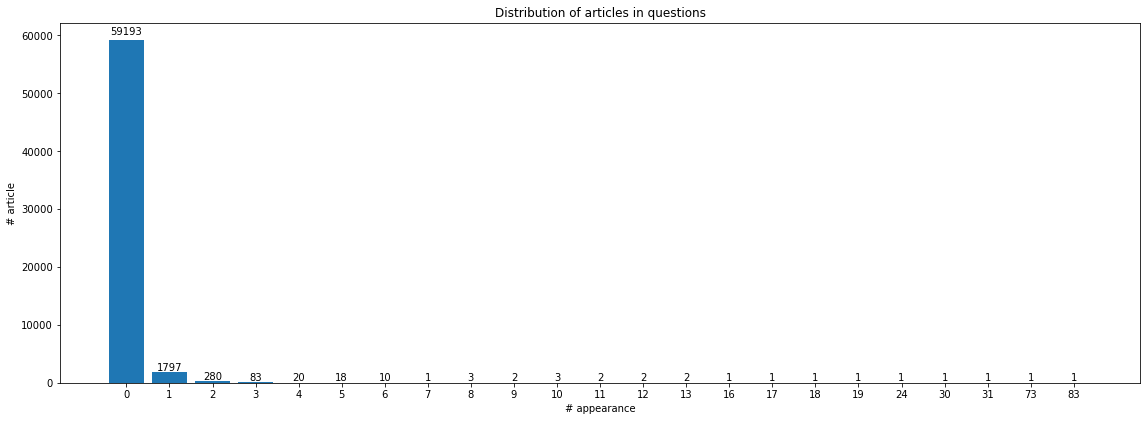

In [22]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('# appearance')
ax.set_ylabel('# article')
ax.set_title('Distribution of articles in questions')
rects = ax.bar(x, y)
for idx, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
            '%d' % y[idx],
            ha='center', va='bottom')
plt.show()

In [8]:
n_articles_per_question = {}
for question in questions:
    n_art = len(question['relevant_articles'])
    if n_art not in n_articles_per_question.keys():
        n_articles_per_question[n_art] = 1
    else:
        n_articles_per_question[n_art] += 1

In [9]:
print(n_articles_per_question)

{1: 3103, 2: 84, 3: 9}


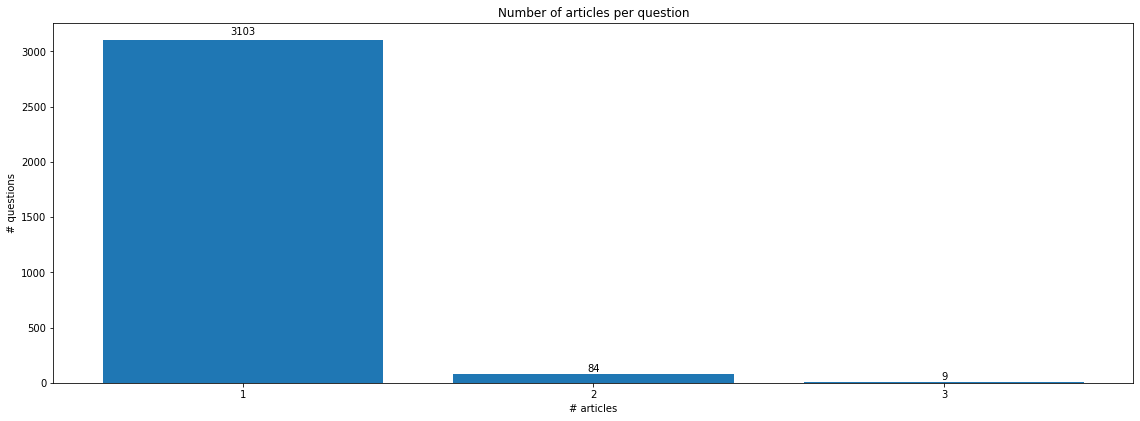

In [10]:
x, y = [], []
for key in sorted(n_articles_per_question.keys()):
    x.append(str(key))
    y.append(n_articles_per_question[key])
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('# articles')
ax.set_ylabel('# questions')
ax.set_title('Number of articles per question')
rects = ax.bar(x, y)
for idx, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
            '%d' % y[idx],
            ha='center', va='bottom')
plt.show()

In [2]:
import sys
print(sys.executable)

/usr/bin/python3


In [15]:
from nltk.tokenize import RegexpTokenizer
tokenizer_regexp = RegexpTokenizer(r'\w+')

question_lens = [{'min': 0, 'max': 0, 'count': 0},
              {'min': 1, 'max': 10, 'count': 0}, 
              {'min': 11, 'max': 20, 'count': 0}, 
              {'min': 21, 'max': 30, 'count': 0},
              {'min': 31, 'max': 50, 'count': 0}]
question_lens_pie = [{'min': 1, 'max': 10, 'count': 0}, 
              {'min': 11, 'max': 20, 'count': 0}, 
              {'min': 21, 'max': 30, 'count': 0},
              {'min': 31, 'max': 50, 'count': 0}]
n_questions = 0
for question in questions:
    n_questions += 1
    ques = question['question']    
    ques_len = len(tokenizer_regexp.tokenize(ques))
        
    for item in question_lens:
        if ques_len >= item['min'] and ques_len <= item['max']:
            item['count'] += 1
            break
            
    for item in question_lens_pie:
        if ques_len >= item['min'] and ques_len <= item['max']:
            item['count'] += 1
            break
print(question_lens)
print(question_lens_pie)
print(n_questions)

[{'min': 0, 'max': 0, 'count': 0}, {'min': 1, 'max': 10, 'count': 215}, {'min': 11, 'max': 20, 'count': 1716}, {'min': 21, 'max': 30, 'count': 1137}, {'min': 31, 'max': 50, 'count': 128}]
[{'min': 1, 'max': 10, 'count': 215}, {'min': 11, 'max': 20, 'count': 1716}, {'min': 21, 'max': 30, 'count': 1137}, {'min': 31, 'max': 50, 'count': 128}]
3196


In [12]:
# Draw column chart for title length
def draw_bar_chart(items, xlabel, ylabel, name):
    x, y = [], []
    for item in items:
        x.append(str(item['min']) + '-' + str(item['max']))
        y.append(item['count'])
    plt.rcParams['figure.figsize'] = [15, 5]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(name)
    rects = ax.bar(x, y)
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % items[idx]['count'],
                ha='center', va='bottom')
    plt.show()

def draw_pie_chart(items):
    x, y, explode = [], [], []
    for item in items:
        x.append(str(item['min']) + '-' + str(item['max']))
        y.append(item['percentage'])
        explode.append(0)
    plt.rcParams['figure.figsize'] = [15, 5]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     ax.set_title(name)
#     rects = ax.bar(x, y)
#     for idx, rect in enumerate(rects):
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
#                 '%d' % items[idx]['count'],
#                 ha='center', va='bottom')

    ax.pie(y, explode=tuple(explode), labels=x, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.show()

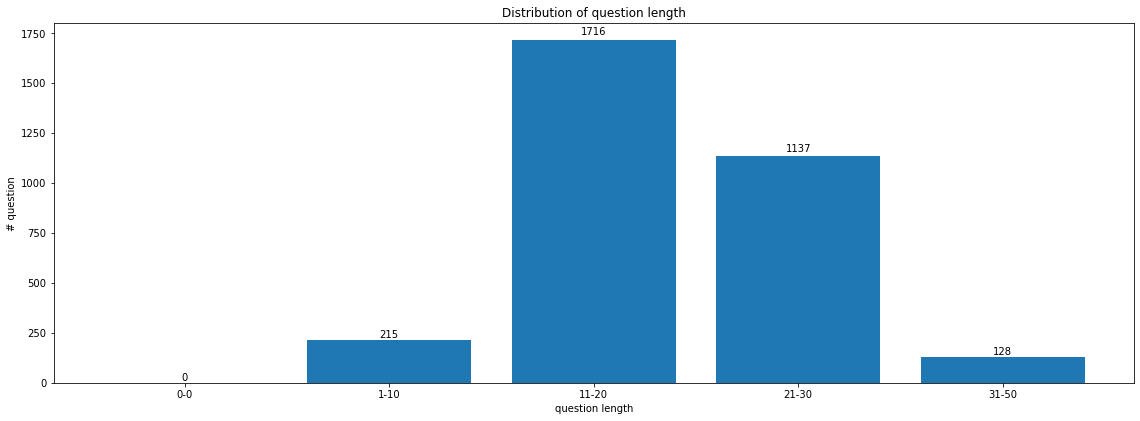

In [13]:
draw_bar_chart(question_lens, 'question length', '# question', 'Distribution of question length')

In [16]:
for item in question_lens_pie:
    item['percentage'] = item['count'] * 100 / n_questions

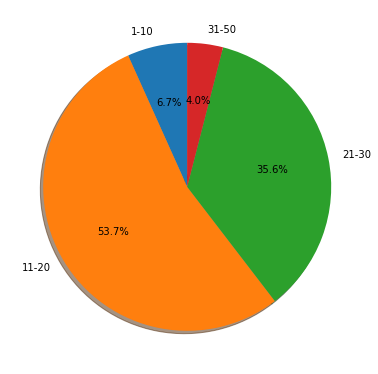

In [17]:
draw_pie_chart(question_lens_pie)

In [20]:
f_question = open('data/public_test_question.json')
questions = json.load(f_question)
questions = questions['items']

In [21]:
from nltk.tokenize import RegexpTokenizer
tokenizer_regexp = RegexpTokenizer(r'\w+')

question_lens = [{'min': 0, 'max': 0, 'count': 0},
              {'min': 1, 'max': 10, 'count': 0}, 
              {'min': 11, 'max': 20, 'count': 0}, 
              {'min': 21, 'max': 30, 'count': 0},
              {'min': 31, 'max': 50, 'count': 0}]
question_lens_pie = [{'min': 1, 'max': 10, 'count': 0}, 
              {'min': 11, 'max': 20, 'count': 0}, 
              {'min': 21, 'max': 30, 'count': 0},
              {'min': 31, 'max': 50, 'count': 0}]
n_questions = 0
for question in questions:
    n_questions += 1
    ques = question['question']    
    ques_len = len(tokenizer_regexp.tokenize(ques))
        
    for item in question_lens:
        if ques_len >= item['min'] and ques_len <= item['max']:
            item['count'] += 1
            break
            
    for item in question_lens_pie:
        if ques_len >= item['min'] and ques_len <= item['max']:
            item['count'] += 1
            break
print(question_lens)
print(question_lens_pie)
print(n_questions)

[{'min': 0, 'max': 0, 'count': 0}, {'min': 1, 'max': 10, 'count': 30}, {'min': 11, 'max': 20, 'count': 275}, {'min': 21, 'max': 30, 'count': 195}, {'min': 31, 'max': 50, 'count': 11}]
[{'min': 1, 'max': 10, 'count': 30}, {'min': 11, 'max': 20, 'count': 275}, {'min': 21, 'max': 30, 'count': 195}, {'min': 31, 'max': 50, 'count': 11}]
511


In [22]:
for item in question_lens_pie:
    item['percentage'] = item['count'] * 100 / n_questions

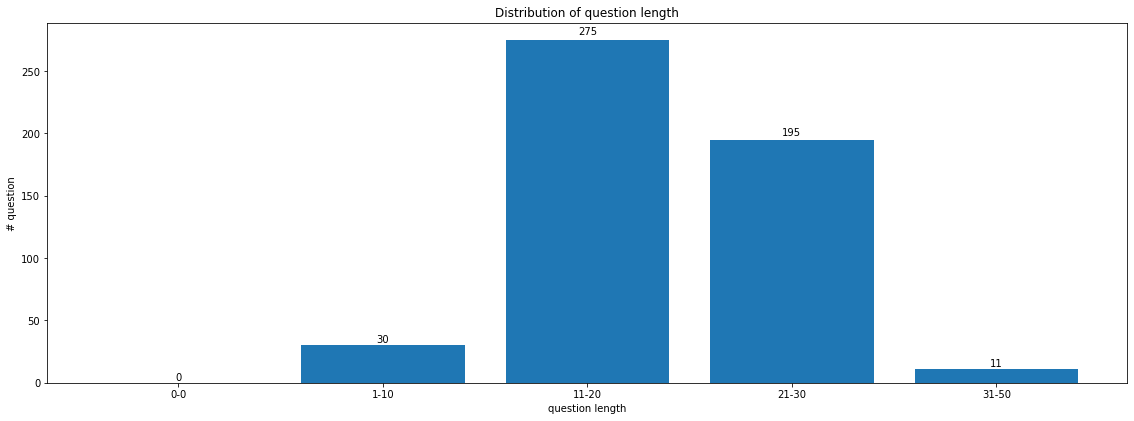

In [23]:
draw_bar_chart(question_lens, 'question length', '# question', 'Distribution of question length')

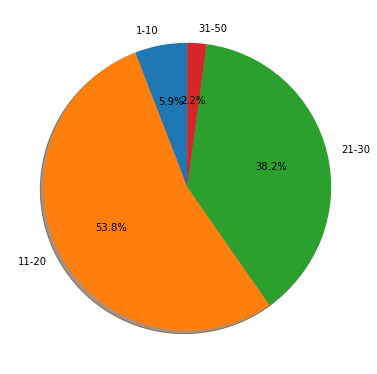

In [24]:
draw_pie_chart(question_lens_pie)